# Exploring curve-fitting through neutron diffraction data and modeling  magnetic signal. 

## Introduction

In this report we use curve-fitting methods to fit to some data a standard curve, where the function of the curve is derived from the scientific background, in this case the curve fitting requires a choice of some parameters that have physical significance. The data we analyse here is relevent to a phenomenon that is exhibited by magnetic solids, it is called *Antiferromagnetism*; alternating magnetic moments. The goal of this repot is to demonstrate curve-fitting and the physics and the findings are just a example relating to interesting physics.

The reason this data is interesting is the characteristic peaks of the diffraction patterns due to incident beams of radiation. Alternating magnetic moments increases the crystallographic unit cell size for radiation beams sensitive to magnetism [1], in this case the radiation is caused by neutrons. The solid has no magnetic moment due to this phenomenon, thus this behaivor is difficult to observe directly. In this report we focus on exploring *transition temperature* and the *critical exponent*, two of the variables of interest. The neutron diffraction data of compound, methylammonium manganese(II) formate (CH3NH3Mn(HCO2)3) [9] was collected at ISIS [2].

## Methods

In [42]:
import os
import random
from numpy import loadtxt, trapz, where, array, shape, log, linspace, concatenate, random, logspace, sqrt, diag
from pylab import plot, grid, xlim, ylim, xlabel, ylabel, linspace, figure, legend, show, axvline, subplots

%matplotlib notebook

<IPython.core.display.Javascript object>


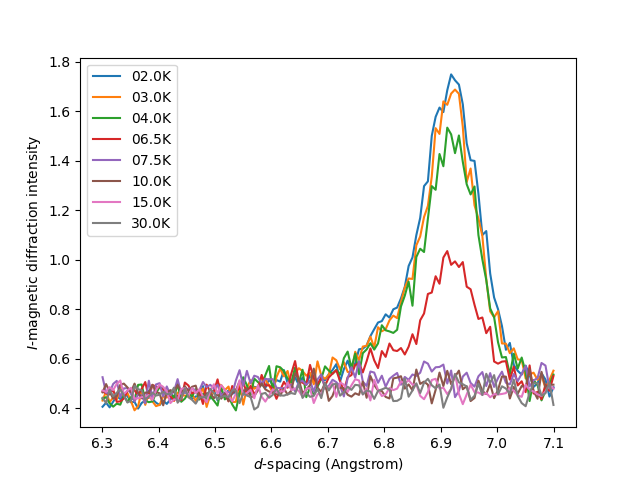

  Temperature        Shape     
     2.0            (121, 2) 
     3.0            (121, 2) 
     4.0            (121, 2) 
     6.5            (121, 2) 
     7.5            (121, 2) 
    10.0            (121, 2) 
    15.0            (121, 2) 
    30.0            (121, 2) 


In [75]:
%matplotlib notebook
directory = "G:\\SPA5666\\ap17080\\project2_data" # for when i use it at uni 
#directory = "C:\\Users\\Zahaab\\ap17080\\project2_data" # for when i use the code at home
#You will probably need to change this
data = []

Temperatures = []
figure()
for filename in os.listdir(directory):
    Temperatures.append(float(filename[5:9]))
    ã = loadtxt(directory + '\\' + filename) # ã used to not confuse with other a
    data.append(ã)
    plot(ã[:,0], ã[:,1], label = filename[5:10])

xlabel("$d$-spacing (Angstrom)")
ylabel("$I$-magnetic diffraction intensity") 
show()
legend()

print("{:^15} {:^15}".format("Temperature", "Shape"))

for i in range(len(data)):
    print("{:8}            {} ".format(Temperatures[i], shape(data[i])))# putting in the spaces is a bad way of doing this but
    #I couldn't find another way of formating this as the shape is a tuple
Out = None # Ipython is weird 

### Preparing our data

When preparing the data there are two things to consider what format is it in and what is the best format for what we want to do with our data. Our data is eight data sets in txt files named TTTTT.txt, where TTTTT represents the temperature at which the data were collected. In each data set, the first column is “$d$-spacing”, a common quantity in crystallography, measured in angstrom ($1\,\mathrm{Å}=10^{-10}\,\mathrm{m}$). The second column is the diffracted intensity $I$. The format I put the data in is arrays and lists as they are a more commonly used format in python, Dictionaries are not well suited for this scenario. It should be noted that numpy arrays run faster than lists[3], however it shouldn't have any meaningful effect here as the amount of data being stored isn't large enough.

To unpack the txt files I used the python librarys os and numpy. From os I used os.listdir[4] to allow me to loop through the directory with all the txt files, from numpy I used loadtxt[5], it takes a txt file and returns a list.  

I also printed the shape of the data at all the temperatures, I did this to know that all of the data had the same number of points, thus meaning the code ran as inteded.

### figure 1

For all the figures I make I use the xlabel, ylabel, legend and show functions[6] from pylab to plot the graph. there functions are homological.

figure 1 shows the magnetic diffraction intensity against tempreture for 8 different tempretures. The data is non continuous so graph is not a clear curve. We can observe that tempretures of $6.5Å$ or below, the graphs take the same shape with having a peak at around $6.9k$. The higher tempretures don't seem to show a change in intensity.

### Finding magnetisation

To find the *magnetisation*, we must integrate the diffracted intensity with respect to the $d$-spacing. To do this I integrate using the numpy function trapz[5], this alows us to integrate numerically. I chose to use trapz over other functions that allow numerical integration like scipy.integrate.simps (simpson's rule) from scipy[7] becausd the trapezoidal rule works for all functions[8]. The traps function is used on all the temperatures then ploted using similar methods to figure 1.

<IPython.core.display.Javascript object>


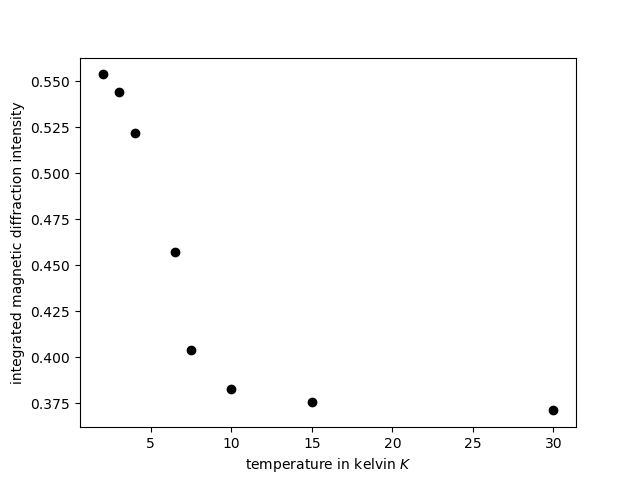

In [76]:
%matplotlib notebook
integrated_data = []
figure()
for i in data: integrated_data.append(trapz(i[:,1], i[:,0]))#N by 2 array 
xlabel("temperature in kelvin $K$")
ylabel("integrated magnetic diffraction intensity")
plot(Temperatures, integrated_data, 'ok')

### Using a function to fit

Figure 2 follows a certain standard shape (which is obtained by some considerations outside the scope of this work) given by

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases},
$$

where $M(T)$ is the magnetisation as a function of temperature and is dependent on the parameters: $A$, $T_0$, $\beta$, and $B$, which are the *magnitude of the magnetic signal*, the *transition temperature*, the *critical exponent*, and *background magnetisation* respectively. 

We can make code for this function and plot it quite easily however, we much chose the starting parameters. For $A$ I guessed the value of $8\cdot10^{-3}Å$, for $T_0$ I knew the answer had to be around $8.0K$[9] from there I guessed till I reached $12.0K$. For $\beta$ I knew it had to be small as it is a exponent and $B$ I obtained a value[10].

J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


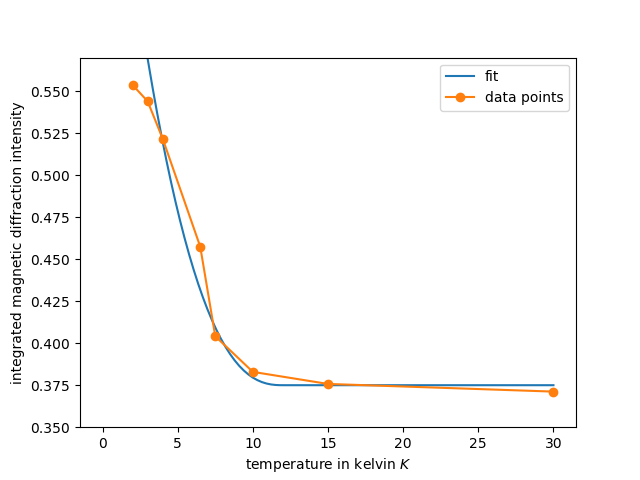

In [77]:
def magnetisation(T, A, T0, β, B):
    return where(T < T0, A*((T0-T)**β) + B, B) # as seen in function

x = linspace(0, 30, 100)
fit = magnetisation(x,8e-4,12,2.5,0.375)
figure()
ylim(0.35,0.57)
plot(x, fit, label = 'fit')
plot(Temperatures, integrated_data, 'o-', label = 'data points')
xlabel("temperature in kelvin $K$")
ylabel("integrated magnetic diffraction intensity")                                                                                                            
legend()

### Figure 3 

graph with the "guess-fit" curves over the data.

### Checking the fit is reasonable

First the values I used for the "guess-fit" where from scientific papers, this is also why the fit graphically looks good and cross the data points. To check how close the fit I have is to the data points I wrote a function that integrates both functions and finds the difference between them. The integral of a function is the area under the graph, thus if integrate the data points given using the trapz function and I get points from the function used to find the "guess-fit" and integrate it in the same way we can find out how accurate the fit is.

In [78]:
def integral_compair(array_, f, param, a = 2, b = 30):#this code was code written
    z = trapz(array_,Temperatures)
    array_temps = linspace(a, b)
    y_array_fit = f(array_temps ,8e-4,12,2.5,0.375)# finding y values to use trapz
    integral_fit = [(array_temps[i],y_array_fit[i]) for i in range(len(array_temps))]
    x = trapz(y_array_fit,array_temps)
    return abs(z - x)
    #print(y)
    #print(trapz(y_array_fit, array_temps, axis= -1))

integral_compair(integrated_data, magnetisation, (8e-4,12,2.5,0.375))

J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


0.0054338967252647308

The value given by integral_compair using the same results as the "guess-fit" in figure 3 is very small thus the fit must be close to the best fit

### Fitting the data 

Now we have a fit for the data that is close to the best fit we can use it to find the better starting parameters using curve_fit from the scipy module. curve_fit even gives us the uncertainty between the two values which will be interesting. I then take the new parameters and run plot the graph called figure 4

Best fit parameters are A=  0.0775017696348 T0=  7.61870420289 β=  0.488340307299 B=  0.376594762381
Corresponding uncertainties A=  0.00665929146142 T0=  0.0711932345062 β=  0.0504965603828 B=  0.00279880648605


J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


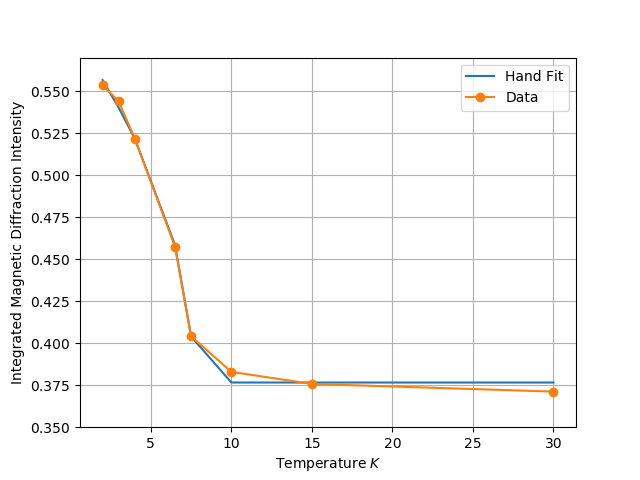

In [79]:
from scipy.optimize import curve_fit

result, covar = curve_fit(magnetisation, Temperatures, integrated_data, p0 = [8e-4,12,2.5,0.375])
A, T0, β, b = result
Au, T0u, βu, bu = sqrt(diag(covar))# u for uncertainties 
print('Best fit parameters are A= ', A, 'T0= ',T0,'β= ',β, 'B= ',b)
print('Corresponding uncertainties A= ', Au, 'T0= ',T0u,'β= ',βu, 'B= ',bu)

%matplotlib notebook

hand_fit = magnetisation(Temperatures, A, T0, β, b)

figure()
plot(Temperatures, hand_fit, label = 'Hand Fit')
plot(Temperatures, integrated_data, 'o-', label = "Data")
xlabel('Temperature $K$')
ylim(0.35,0.57)
grid()
ylabel('Integrated Magnetic Diffraction Intensity')
legend()


## Results

We now have the results for the best fit parameters which are:

$A= 0.0775017696348\pm0.00665929146142Å$<br> 
$T_0=  7.61870420289\pm0.0711932345062K$<br> 
$β=  0.488340307299\pm0.0504965603828$ (exponent so no units)<br> 
$B=  0.376594762381\pm0.00279880648605$ (background radiation so no units)<br> 

## Discussion

### Are these results accurate?

The best fit parameters I obtained are derived from my "guessed-fit" parameters, thus if my guess fit was off in a substantial way it would lead to an unacurate answer. I know this is not the case because of 3 reasons, first the precistion on my results aren't unreasonably large for only having eight data points, curve_fit finds undertainy from comparing the data points to the fit and looping through till it finds the best fit[8] thus my final answer shouldn't be dictated by my initial guess completely. Secondly I checked how close my "guess-fit" was to the data points using integral_compair and they where almost the same my initial guess couldn't have been completely absurd. Lastly my result for $T_0$ agrees with the paper I quoted.

### The result of $A$ :

This result was the furthest from what I guessed; I guessed a value that was one magnitude smaller than it should have been. This happend because this value was a compleat guess, unlike the others I could not find a reasonable starting point. In hindsite I probably could have made a better guess if I understood magnetic signals better. The uncertainy is only $8.59\%$ which is reasonable.


### The result of $T_0$ :

This result is suprisingly closer to the $8.0K$[9] I quoted earlier, perhaps due to my bad guess for $A$, my tests lead me to $12.0K$ as a starting guess. The uncertainy is only $0.93\%$ which is reasonable.

### The result of $β$ :

This result is small(\<1) as expected. The uncertainy is only $10.34\%$ which is reasonable.

### The result of $B$ :

This value is close to the guess value probably because I got it form a real paper. The uncertainy is only $0.74\%$ which is reasonable.

### What would you expect the intensity of the magnetic peak to be at $0 K$?

Since we now have all constants we can now ask what happens if we reach absolute zero theoretically.

$M(T) = A(T_0 - T)^\beta+ B = 0.0775017696348(7.61870420289 - 0)^{0.488340307299} + 0.376594762381 = 0.58550980531 Am^{-1}$

The important thing to note here is that the value is non zero.

### How sensitive is the fit to noise in the data?

In the function noise below I use a the random.seed and random.normal functions from the random library[11] and re-opend the data from the txt files but this time I plot the random.normal values of the data and plot it. From there I integrate the data using the trapz function and plot the integral against temperature. I use the random.seed function so that when someone else runs my code they get the same random numbers as I did. I use random.normal so I can choose how far away from the initial value the "random" numbers I obtain are and through chosing different values for the standard deviation I should be able to find the uncertainty or at least the magnitude of the uncertainty.

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


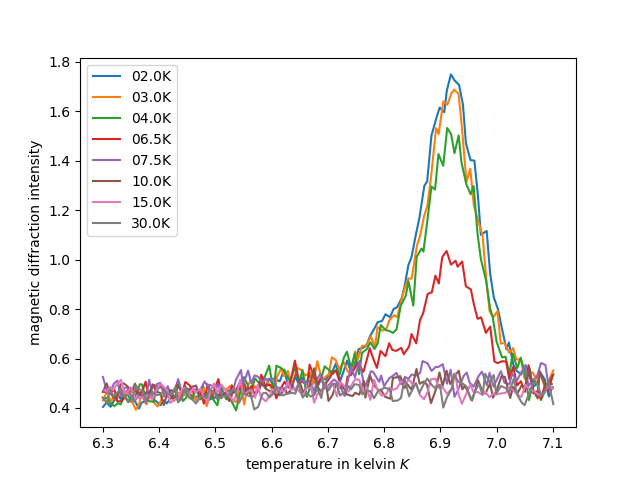

<IPython.core.display.Javascript object>


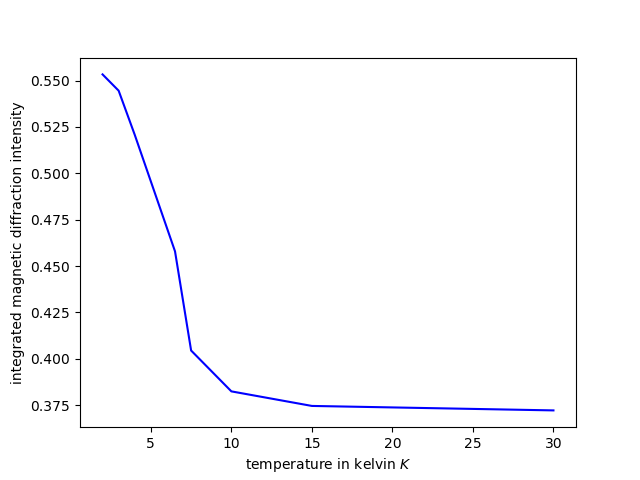

<IPython.core.display.Javascript object>


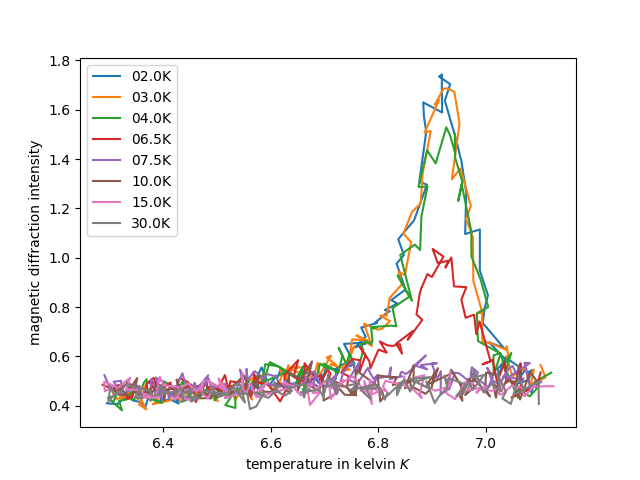

<IPython.core.display.Javascript object>


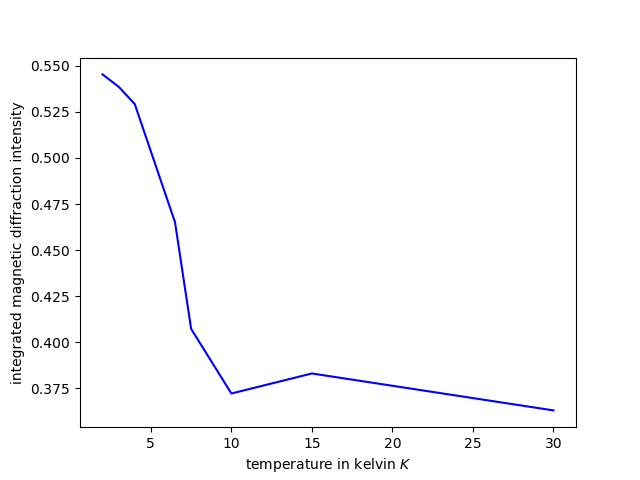

<IPython.core.display.Javascript object>


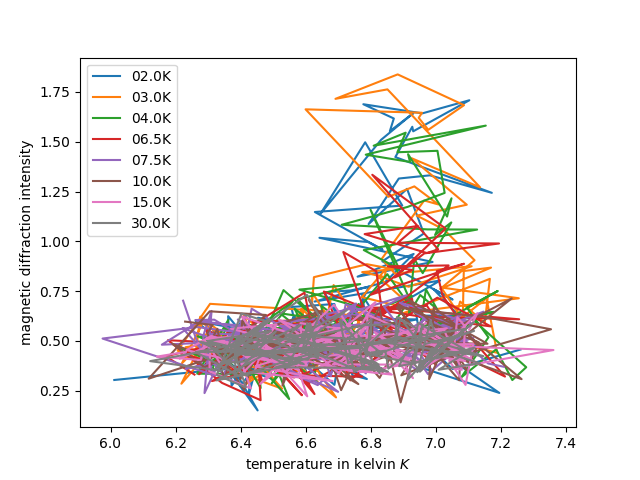

<IPython.core.display.Javascript object>


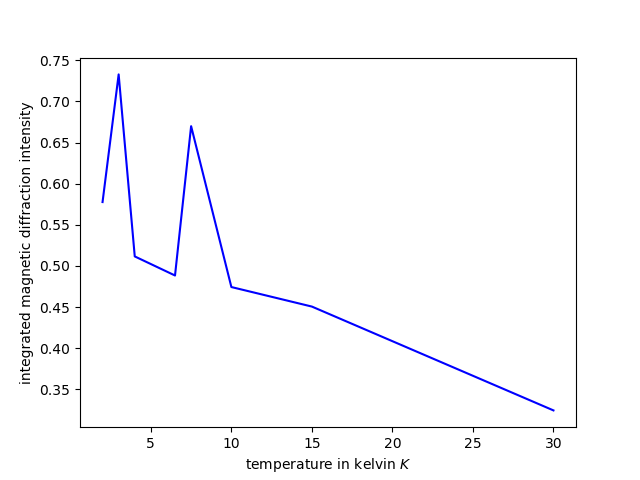

<IPython.core.display.Javascript object>


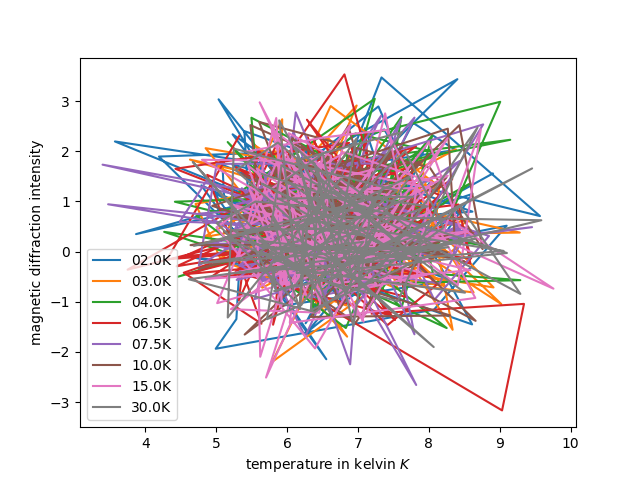

<IPython.core.display.Javascript object>


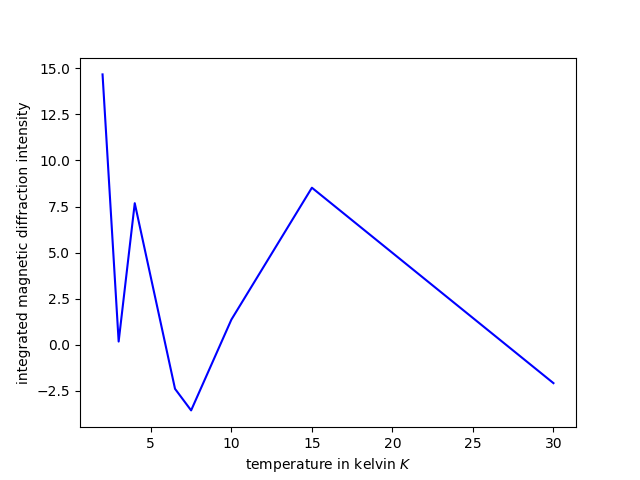

In [80]:
%matplotlib
random.seed(420) #blaze, used to get same numbers

noise_data = []#this code was code written

def noise(x):
    noise_data = []
    figure()
    for filename in os.listdir(directory):
        
        ã = loadtxt(directory + '\\' + filename) 
        b = []
        for i in ã:
            b.append(random.normal(i,x))
        noise_data.append(array(b))
        plot(array(b)[:,0], array(b)[:,1], label = filename[5:10]) 
    legend()
    xlabel("temperature in kelvin $K$")
    ylabel("magnetic diffraction intensity")   
    return noise_data

li = [0.001,0.01,0.1,1]

for i in li:
    integrated_noise_data =[]
    noise_data = noise(i)
    figure()
    integrated_noise_data
    for j in noise_data: 
        integrated_noise_data.append(trapz(j[:,1], j[:,0]))
    xlabel("temperature in kelvin $K$")
    ylabel("integrated magnetic diffraction intensity")
    plot(Temperatures, integrated_noise_data, 'blue')
Out = None

As I vary the standard deviation of the random numbers the graphs of magnetic diffraction intensity become less recognisable as expected. For figure 6 and 8, which are the first two integrated magnetic diffraction intensity graphs, maintain the same shape. So I would say that the fit is sensitive to values $0.01$ standard deviations away from the original data.

Figure 5 looks almost the same as figure 1 thus I believe the magnitude of the uncertainty of this data to be around $0.001$

### Varying A

Since my A was my worst guess I am checking what would have been a better guess by varying through different values of A using a loop.

In [82]:
%matplotlib notebook
i = 1
Av = 0
for i in range(0,100,5):
    Avarying = curve_fit(magnetisation,T,integrated_data,p0 = [Av,12,2.5,0.375])
    
    Av, T0, β, b = Avarying[0]
    Agra = magnetisation(T, Av, T0, β, b) 
    print(Av , 'when the initial guess is' , (i/500))
    Av = i/100
    i=i+1 

0.0775017279326 when the initial guess is 0.0
0.0775017279326 when the initial guess is 0.01
0.085898697375 when the initial guess is 0.02
0.0775017673743 when the initial guess is 0.03
0.085898652592 when the initial guess is 0.04
0.0858986408143 when the initial guess is 0.05
0.077501701415 when the initial guess is 0.06
0.0858987417019 when the initial guess is 0.07
0.0858986782124 when the initial guess is 0.08
0.0858986473552 when the initial guess is 0.09
0.0858986135441 when the initial guess is 0.1
0.0858985952857 when the initial guess is 0.11
0.085898566967 when the initial guess is 0.12
0.0858985580728 when the initial guess is 0.13
0.0858985484652 when the initial guess is 0.14
0.085898550556 when the initial guess is 0.15
0.0858985367648 when the initial guess is 0.16
0.085898527015 when the initial guess is 0.17
0.0858985272817 when the initial guess is 0.18
0.0858985129058 when the initial guess is 0.19


J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


So the initial guess for the amplitude does not impact the value we get by much and the two values we get are 0.0775017 and 0.085898. This leads me to believe that the real value is around 0.08 which agrees with previous data from other papers[9].

### What happens if you delete just one point: does the fit change much?

To do this I wrote code that deletes one data point at a time from my list of data points, then I plot the data with the best fir curve. I used subplots in the pylab library[6] to make it easier to view. The code also has a drawback that it deletes a data point every time so previous code must be re-executed. 

8 8


<IPython.core.display.Javascript object>


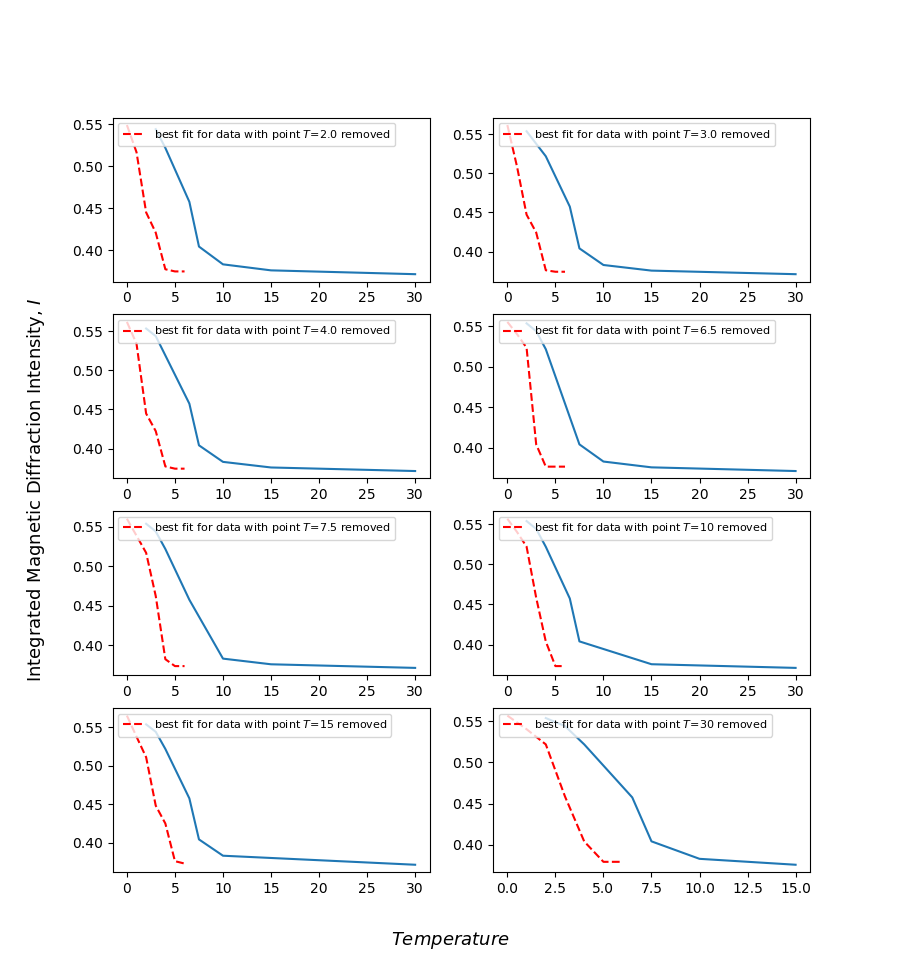

J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


In [83]:
%matplotlib notebook
print(len(integrated_data), len(Temperatures))#this code was code written
full_integrals = tuple(integrated_data)
full_temps= tuple(Temperatures)
T = [2.0,3.0,4.0,6.5,7.5,10,15,30]
fig,axes = subplots(2,4,sharex=True,sharey=True, figsize=(9,9.8))

for i in range(len(integrated_data)):
    subplot(4, 2, i+1)
    del integrated_data[i]   
    del Temperatures[i]
    
    plot(Temperatures, integrated_data)
    
    A, T0, β, b = 8e-4,12,2.5,0.375
    best_params = curve_fit(magnetisation, array(Temperatures), array(integrated_data), p0 = [A, T0, β, b ])[0]
    A, T0, β, b = best_params
    plot(magnetisation(Temperatures, A, T0, β, b), '--r', label= 'best fit for data with point $T$={} removed'.format(T[i]))
    legend(loc=2, fontsize= 8)
    integrated_data = list(full_integrals)
    Temperatures = list(full_temps)
    integrated_data = list(full_integrals)
    Temperatures = list(full_temps)
    
fig.text(0.5, 0.04, '$Temperature$', va='center', ha='center', fontsize=13)
fig.text(0.04, 0.5, 'Integrated Magnetic Diffraction Intensity, $I$', va='center', ha='center', rotation='vertical',fontsize=13)
show()

integrated_data = list(full_integrals)
Temperatures = list(full_temps)

*run the 2nd and 3rd boxes of code if this doesn't work*

As the temperatures that we have for the data are skewed toward lower tempretures so removing data points closer to the end of the set have a larger effect on the graph. This can be seen in figure 11. 

## Conclusions

We have used curve-fitting techniques to calculate the *magnitude of the magnetic signal*, the *transition temperature*, the *critical exponent*, and *background magnetisation* and their uncertainties. I found similar results to previously found best fit values[9][10], form there I concluded the initial guesses don't having a large effect on the final values. To verify this, I varied the parameter $A$ and validated that the best fit parameters don't change much based on the initial guess. I also showed that adding noise within $0.01$ or less standard deviations from the the data points with the data points centred at the mean are negligible and give the same results. I also estimsted that the uncertainy of the data had an order of magnitude of $10^{-3}$ or less. Finally, by removing points to the fit I saw the latter data points had a larger effect on the plot, the *transition temperature* is the most effected parameter when removing points. The further reaserch from this that is most important is intensity of the magnetic peak to be at 0 K as I do not expect it to be $0.58550980531 Am^{-1}$. If this is not the value for intensity of the magnetic peak at absolute zero this model may be wrong in other aspects as well.

## References

[[1](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)]C. G. Shull, W. A. Strauber, and E. O. Wollan, Phys. Rev. 83, (1951) <br>
[2] link to files   G:\\SPA5666\\ap17080\\project2_data #This is probably the same as [9] but I'm uncertain <br>
[[3](https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference)] numpy arrays faster than lists date accessed (11/11/2018, 10:00)<br>
[[4](https://docs.python.org/3/library/os.html)] os library page function index, date accessed (11/11/2018, 10:10)<br>
[[5](https://docs.scipy.org/doc/numpy/reference/routines.html)] numpy library, function index, date accessed (11/11/2018, 11:07)<br>
[[6](https://matplotlib.org/api/index.html)] matplotlib functions index, date accessed (11/11/2018, 11:07)<br>
[[7](https://docs.scipy.org/doc/scipy/reference/integrate.html)] scipy.integrate function index, date accessed (11/11/2018, 12:11)<br>
[8] Rahman, Qazi I.; Schmeisser, Gerhard, (December 1990), "Characterization of the speed of convergence of the trapezoidal rule", Numerische Mathematik, page: 123–138, ISSN 0945-3245 <br>
[9] Journal of Materials Chemistry C, B. Pato-Doldán,‡§*aL. C. Gómez-Aguirre,§aA. P. Hansen,bJ. Mira,cS. Castro-Garcı́a,aM. Sánchez-Andújar,aM. A. Señarı́s-Rodrı́guez,aV. S. ZapfbandJ. Singleton, (April 2016), "Magnetic transitions and isotropic versus anisotropic magnetic behaviour of [CH3NH3][M(HCOO)3]M=Mn2+,Co2+,Ni2+,Cu2+metal–organicperovskites", page: 4 <br>
[10]C. G. SHULL, W. A. STRAUBER, E.O.WOLLAN, (Received March 2, 1951), "Neutron Diffraction by Paramagnetic and Antiferromagnetic Substances" <br>
[[11](https://docs.python.org/3.7/library/random.html)] random library, function index, date accessed (12/11/2018, 10:56)<br>
[[12](https://www.youtube.com/watch?v=dQw4w9WgXcQ)] proof of Riemann hypothesis, date accessed (12/11/2018, 13:37)